In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_parquet('./all_matches_with_predictions.snappy.parquet')

In [55]:
df.head()

,abbreviation,country,country_code,id_x,name,qualifier,match_id,probability,id_y,winner_id,expected_result,actual_result
0,100,None,None,sr:competitor:401559,100 Thieves,home,sr:match:14588484,39.7,sr:match:14588484,sr:competitor:240580,0,0
1,TL,Netherlands,NLD,sr:competitor:240580,Liquid,away,sr:match:14588484,60.3,sr:match:14588484,sr:competitor:240580,1,1
2,TSM,USA,USA,sr:competitor:240582,TSM,home,sr:match:14588486,63.7,sr:match:14588486,sr:competitor:240582,1,1
3,CLG,USA,USA,sr:competitor:240566,Counter Logic Gaming,away,sr:match:14588486,36.3,sr:match:14588486,sr:competitor:240582,0,0
4,CLU,None,None,sr:competitor:401561,Clutch Gaming,home,sr:match:14588488,55.3,sr:match:14588488,sr:competitor:401561,1,1


In [56]:
df['diff'] = df.actual_result - df.expected_result
df['diffPct'] = (100*df.actual_result) - df.probability
df['diffPctOffEven'] = 50 - (100 - df.probability)


df.head()

,abbreviation,country,country_code,id_x,name,qualifier,match_id,probability,id_y,winner_id,expected_result,actual_result,diff,diffPctOffEven,diffPct
0,100,None,None,sr:competitor:401559,100 Thieves,home,sr:match:14588484,39.7,sr:match:14588484,sr:competitor:240580,0,0,0,-10.3,-39.7
1,TL,Netherlands,NLD,sr:competitor:240580,Liquid,away,sr:match:14588484,60.3,sr:match:14588484,sr:competitor:240580,1,1,0,10.3,39.7
2,TSM,USA,USA,sr:competitor:240582,TSM,home,sr:match:14588486,63.7,sr:match:14588486,sr:competitor:240582,1,1,0,13.7,36.3
3,CLG,USA,USA,sr:competitor:240566,Counter Logic Gaming,away,sr:match:14588486,36.3,sr:match:14588486,sr:competitor:240582,0,0,0,-13.7,-36.3
4,CLU,None,None,sr:competitor:401561,Clutch Gaming,home,sr:match:14588488,55.3,sr:match:14588488,sr:competitor:401561,1,1,0,5.3,44.7


In [72]:
def funca(row):
    if(row.probability > 50 and expected_result)
[funca(row) for i, row in df.iterrows()]

0       0.0
1      60.3
2      63.7
3       0.0
4      55.3
5       0.0
6       0.0
7      70.6
8       0.0
9      56.3
10     73.4
11      0.0
12      0.0
13     20.2
14     41.7
15      0.0
16      0.0
17     59.1
18     54.2
19      0.0
20      0.0
21     63.5
22      0.0
23     33.7
24     24.8
25      0.0
26     64.1
27      0.0
28     50.8
29      0.0
       ... 
168    35.2
169     0.0
170    56.4
171     0.0
172    65.3
173     0.0
174     0.0
175    63.4
176    39.8
177     0.0
178    37.7
179     0.0
180    56.2
181     0.0
182     0.0
183    62.0
184     0.0
185    50.1
186     0.0
187    55.1
188    68.2
189     0.0
190    64.0
191     0.0
192    69.1
193     0.0
194    63.8
195     0.0
196     0.0
197    58.2
Length: 198, dtype: float64

In [57]:
stats = df[['abbreviation', 'diff']].groupby(['abbreviation'], as_index=False).agg(['mean', 'std'])
stats_reset = stats.reset_index()

new_df = pd.DataFrame()
new_df['team'] = stats_reset['abbreviation']

new_df['mean'] = stats_reset['diff']['mean']
new_df['std'] = stats_reset['diff']['std']
new_df

,team,mean,std
0,100,-0.173913,0.491026
1,C9,0.157895,0.501460
2,CLG,0.055556,0.639137
3,CLU,-0.111111,0.676400
4,FLY,0.333333,0.483046
5,FOX,-0.095238,0.538958
6,GOG,0.117647,0.600245
7,OPG,0.333333,0.594089
8,TL,-0.300000,0.470162
9,TSM,-0.217391,0.599736


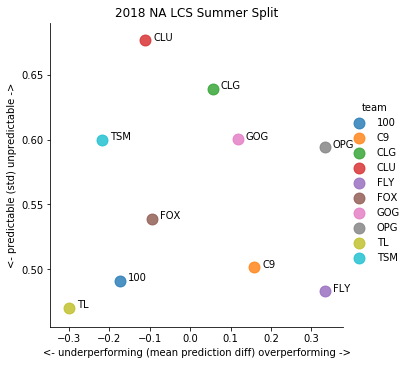

In [58]:
# sns.set_context('talk')

p1 = sns.lmplot(x='mean', y='std', hue='team', fit_reg=False, data=new_df, scatter_kws={"marker": "D", "s": 120})
plt.title("2018 NA LCS Summer Split")
plt.xlabel("<- underperforming (mean prediction diff) overperforming ->")
plt.ylabel("<- predictable (std) unpredictable ->")

for index, row in new_df.iterrows():
    p1.ax.annotate(row['team'], (row['mean'] + 0.02, row['std']))

p1

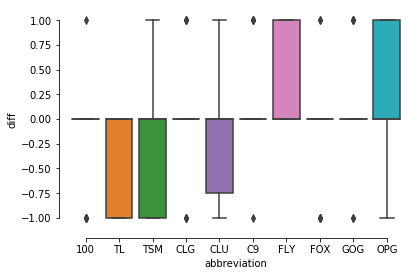

In [64]:
sns.boxplot(x="abbreviation", y="diff",
            data=df)
sns.despine(offset=10, trim=True)

In [59]:
stats = df[['abbreviation', 'diffPct']].groupby(['abbreviation'], as_index=False).agg(['mean', 'std'])
stats
stats_reset = stats.reset_index()

new_df = pd.DataFrame()
new_df['team'] = stats_reset['abbreviation']

new_df['mean'] = stats_reset['diffPct']['mean']
new_df['std'] = stats_reset['diffPct']['std']
new_df

,team,mean,std
0,100,1.269565,47.531496
1,C9,12.521053,46.194571
2,CLG,-7.733333,49.462309
3,CLU,-13.733333,49.745659
4,FLY,6.895238,47.554815
5,FOX,-2.100000,49.519834
6,GOG,-14.517647,48.137618
7,OPG,11.305556,51.901122
8,TL,5.085000,49.953961
9,TSM,-1.730435,50.429667


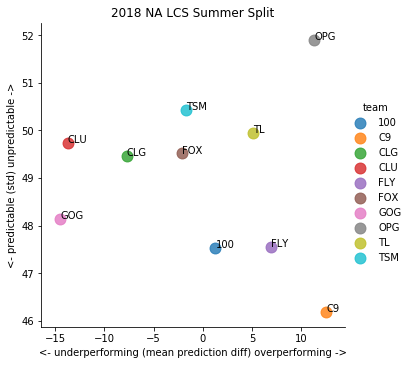

In [60]:
# sns.set_context('talk')

p1 = sns.lmplot(x='mean', y='std', hue='team', fit_reg=False, data=new_df, scatter_kws={"marker": "D", "s": 120})
plt.title("2018 NA LCS Summer Split")
plt.xlabel("<- underperforming (mean prediction diff) overperforming ->")
plt.ylabel("<- predictable (std) unpredictable ->")

for index, row in new_df.iterrows():
    p1.ax.annotate(row['team'], (row['mean'] + 0.02, row['std']))

p1

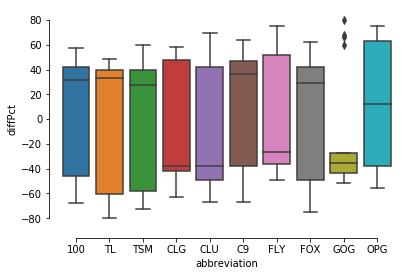

In [61]:
sns.boxplot(x="abbreviation", y="diffPct",
            data=df)
sns.despine(offset=10, trim=True)

In [62]:
stats = df[['abbreviation', 'diffPctOffEven']].groupby(['abbreviation'], as_index=False).agg(['mean', 'std'])
stats
stats_reset = stats.reset_index()

new_df = pd.DataFrame()
new_df['team'] = stats_reset['abbreviation']

new_df['mean'] = stats_reset['diffPctOffEven']['mean']
new_df['std'] = stats_reset['diffPctOffEven']['std']
new_df

,team,mean,std
0,100,5.252174,10.925278
1,C9,0.636842,11.906917
2,CLG,-3.377778,9.016166
3,CLU,-2.933333,11.031292
4,FLY,-9.276190,9.593326
5,FOX,4.480952,11.011885
6,GOG,-11.952941,8.550593
7,OPG,-11.305556,10.525458
8,TL,14.915000,7.506367
9,TSM,8.252174,9.704585


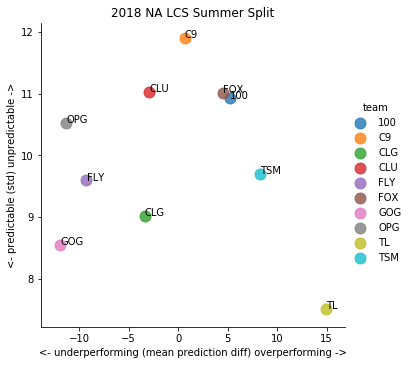

In [63]:
# sns.set_context('talk')

p1 = sns.lmplot(x='mean', y='std', hue='team', fit_reg=False, data=new_df, scatter_kws={"marker": "D", "s": 120})
plt.title("2018 NA LCS Summer Split")
plt.xlabel("<- underperforming (mean prediction diff) overperforming ->")
plt.ylabel("<- predictable (std) unpredictable ->")

for index, row in new_df.iterrows():
    p1.ax.annotate(row['team'], (row['mean'] + 0.02, row['std']))

p1

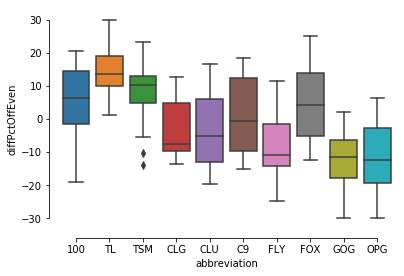

In [65]:
sns.boxplot(x="abbreviation", y="diffPctOffEven",
            data=df)
sns.despine(offset=10, trim=True)

In [69]:
df[df.abbreviation == '100']['probability'].describe()

count    23.000000
mean     55.252174
std      10.925278
min      30.900000
25%      48.650000
50%      56.500000
75%      64.450000
max      70.700000
Name: probability, dtype: float64

In [71]:
df[df.abbreviation == '100'].describe()

,probability,expected_result,actual_result,diff,diffPctOffEven,diffPct
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,55.252174,0.739130,0.565217,-0.173913,5.252174,1.269565
std,10.925278,0.448978,0.506870,0.491026,10.925278,47.531496
min,30.900000,0.000000,0.000000,-1.000000,-19.100000,-67.800000
25%,48.650000,0.500000,0.000000,0.000000,-1.350000,-45.850000
50%,56.500000,1.000000,1.000000,0.000000,6.500000,31.800000
75%,64.450000,1.000000,1.000000,0.000000,14.450000,42.000000
max,70.700000,1.000000,1.000000,1.000000,20.700000,57.500000
